In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_circles,make_moons
import pandas as pd

In [2]:
# Data Generation
df=pd.read_csv("C:/Users/91885/Python programs/Logistic_X_Train.csv")
df1=pd.read_csv("C:/Users/91885/Python programs/Logistic_Y_Train.csv")

(2250,)


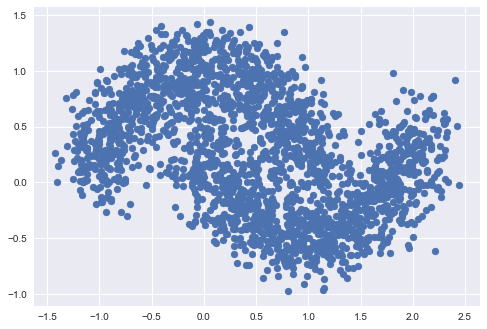

In [7]:
X=df.to_numpy()
Y1=df1.to_numpy(dtype=int)
Y=Y1[:,0]
print(Y.shape)
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1])
plt.show()


In [8]:
#Y=df.to_numpy

In [9]:
# Data Generation
#X,Y=make_circles(n_samples=500, shuffle=True, noise=0.05, random_state=1, factor=0.8)
#X,Y=make_moons(n_samples=500, shuffle=True, noise=0.5, random_state=10)
#X,Y=make_blobs(n_samples=500, n_features=2, centers=2, random_state=10)

In [11]:
print(Y)

[0 0 1 ... 1 1 0]


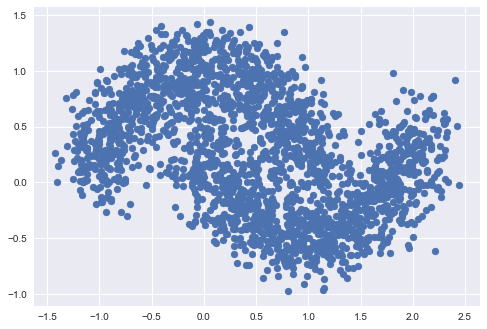

In [12]:
#Visualise Data
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1])
plt.show()

In [13]:
X.shape

(2250, 2)

In [14]:
def softmax(a):
    e_pa=np.exp(a) # vector
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [15]:
a = np.array([[10,10],
              [20,20]])
a_= softmax(a)
print(a_)

[[0.5 0.5]
 [0.5 0.5]]


In [16]:
# Neural Architecture
input_size=2 # Number of features
layers=[4,3] # Number of neurons in hidden layers
output=2 # Number of output classes
class Neuralnetwork:
   def __init__(self,input_size,layers,output):
        np.random.seed(0)
        model={}
        # initialise weight matrix for 1st hidden layer
        model['W1']=np.random.randn(input_size,layers[0])
        # Biases for 1st hidden layer
        model['b1']=np.zeros((1,layers[0]))
        # initialise weight matrix for 2nd hidden layer
        model['W2']=np.random.randn(layers[0],layers[1])
        # initialise biases for 2nd hidden layer
        model['b2']=np.zeros((1,layers[1]))
        # weight matrix for final layer
        model['W3']=np.random.randn(layers[1],output)
        model['b3']=np.zeros((1,output))
        self.model=model
   def forward_prop(self,X):
        model=self.model
        
        W1,W2,W3=model['W1'],model['W2'],model['W3']
        
        b1,b2,b3=model['b1'],model['b2'],model['b3']
        
        z1=np.tanh(np.dot(X,W1)+b1)
        
        z2=np.tanh(np.dot(z1,W2)+b2)
        
        out=softmax(np.dot(z2,W3)+b3)
        self.activation_outputs=(z1,z2,out)
        return out
     
   """def backward(self,x,y,learning_rate=0.001):
        
         W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
         a1,a2,y_ = self.activation_outputs
        
         delta3 = y_ - y
        
         dw3 = np.dot(a2.T,delta3) #)h2+1,C) => (h2+1,m) X (m,C) 
         db3 = np.sum(delta3,axis=0)
        
         delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
         dw2 = np.dot(a1.T,delta2)  
         db2 = np.sum(delta2,axis=0)
        
         delta1 = (1-np.square(a1))*np.dot(delta2,W2.T) 
         dw1 = np.dot(X.T,delta1)
         db1 = np.sum(delta1,axis=0)
        
         self.model['W1'] -= learning_rate*dw1
         self.model['W2'] -= learning_rate*dw2
         self.model['W3'] -= learning_rate*dw3
        
         self.model['b1'] -= learning_rate*db1
         self.model['b2'] -= learning_rate*db2
         self.model['b3'] -= learning_rate*db3
      """
   def backward(self,x,y,learning_rate=0.001):
        model=self.model
       # self.forward_prop(x)
        # Examples or m
        m=x.shape[0]
        
        W1,W2,W3=model['W1'],model['W2'],model['W3']
        b1,b2,b3=model['b1'],model['b2'],model['b3']
        z1,z2,y_=self.activation_outputs
        #last layer
        deltaw3=y_-y
        dw3=np.dot(z2.T,deltaw3)
        #dw3 shii hai
        db3=np.sum(deltaw3,axis=0)
   # deltaw of current layer=deltaw of next layer * weight of next layer * derivative of activation function
        deltaw2=(1-np.square(z2))*np.dot(deltaw3,W3.T)
        dw2=np.dot(z1.T,deltaw2)
        #dw2 shii hai
        db2=np.sum(deltaw2,axis=0)
        deltaw1=(1-np.square(z1))* np.dot(deltaw2,W2.T)
        #dw1 bhii shii kar diyaa
        dw1=np.dot(x.T,deltaw1)
        db1=np.sum(deltaw1,axis=0)
        # update model parameteres
        #w1=w1-learning_rate*dw1
        model['W1']-=learning_rate*dw1
        model['b1']-=learning_rate*db1

        model['W2']-=learning_rate*dw2
        model['b2']-=learning_rate*db2

        model['W3']-=learning_rate*dw3
        model['b3']-=learning_rate*db3
    
   def predict(self,x):
        y_out=self.forward_prop(x)
        return np.argmax(y_out,axis=1)
    
   def summary(self):
        model=self.model
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=model['b1'],model['b2'],model['b3']
        a1,a2,z=self.activation_outputs
        print("W1 ",W1.shape)
        print("W2 ",W2.shape)
        print("W3 ",W3.shape)
        print("a1 ",a1.shape)
        print("a2 ",a2.shape)
        print("z ",z.shape)

In [17]:
def loss(y_oht,p):
    l=-np.mean(y_oht*np.log(p))
    return l
def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

In [18]:
y_oht=one_hot(Y,2)
#print(y_oht)
#neural_net=Neuralnetwork(input_size,layers,output)

In [19]:
#neural_net.backward(learning_rate=0.001,x=X,y=y_oht)
#neural_net.forward_prop(X).shape # y_ kii shape (500,2)

In [20]:
model1 = Neuralnetwork(input_size=2,layers=[10,5],output=2)

In [21]:
model1.forward_prop(X[0])
model1.summary()

W1  (2, 10)
W2  (10, 5)
W3  (5, 2)
a1  (1, 10)
a2  (1, 5)
z  (1, 2)


In [22]:
model1.forward_prop(X[0])

array([[0.56979364, 0.43020636]])

In [23]:
def train(X,Y,model,epochs,learning_rate=0.001,logs=True):
    training_loss=[]
    classes=2
    Y_OHT=one_hot(Y,classes)
    for ix in range(epochs):
        Y_=model.forward_prop(X)
        l=loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
    return training_loss
    

In [24]:
losses=train(X,Y,model1,1000,0.001)

Epoch 0 Loss 0.3980
Epoch 1 Loss 0.4687
Epoch 2 Loss 0.4055
Epoch 3 Loss 0.8492
Epoch 4 Loss 0.2641
Epoch 5 Loss 0.2675
Epoch 6 Loss 0.2458
Epoch 7 Loss 0.2700
Epoch 8 Loss 0.2114
Epoch 9 Loss 0.2339
Epoch 10 Loss 0.1832
Epoch 11 Loss 0.1881
Epoch 12 Loss 0.1616
Epoch 13 Loss 0.1698
Epoch 14 Loss 0.1506
Epoch 15 Loss 0.1636
Epoch 16 Loss 0.1464
Epoch 17 Loss 0.1699
Epoch 18 Loss 0.1427
Epoch 19 Loss 0.1691
Epoch 20 Loss 0.1364
Epoch 21 Loss 0.1607
Epoch 22 Loss 0.1299
Epoch 23 Loss 0.1539
Epoch 24 Loss 0.1237
Epoch 25 Loss 0.1467
Epoch 26 Loss 0.1174
Epoch 27 Loss 0.1383
Epoch 28 Loss 0.1107
Epoch 29 Loss 0.1287
Epoch 30 Loss 0.1037
Epoch 31 Loss 0.1185
Epoch 32 Loss 0.0966
Epoch 33 Loss 0.1086
Epoch 34 Loss 0.0903
Epoch 35 Loss 0.1005
Epoch 36 Loss 0.0855
Epoch 37 Loss 0.0949
Epoch 38 Loss 0.0822
Epoch 39 Loss 0.0912
Epoch 40 Loss 0.0799
Epoch 41 Loss 0.0886
Epoch 42 Loss 0.0783
Epoch 43 Loss 0.0864
Epoch 44 Loss 0.0771
Epoch 45 Loss 0.0845
Epoch 46 Loss 0.0761
Epoch 47 Loss 0.0827
Ep

Epoch 400 Loss 0.0490
Epoch 401 Loss 0.0490
Epoch 402 Loss 0.0490
Epoch 403 Loss 0.0489
Epoch 404 Loss 0.0489
Epoch 405 Loss 0.0489
Epoch 406 Loss 0.0489
Epoch 407 Loss 0.0488
Epoch 408 Loss 0.0488
Epoch 409 Loss 0.0488
Epoch 410 Loss 0.0488
Epoch 411 Loss 0.0487
Epoch 412 Loss 0.0487
Epoch 413 Loss 0.0487
Epoch 414 Loss 0.0487
Epoch 415 Loss 0.0486
Epoch 416 Loss 0.0486
Epoch 417 Loss 0.0486
Epoch 418 Loss 0.0486
Epoch 419 Loss 0.0485
Epoch 420 Loss 0.0486
Epoch 421 Loss 0.0485
Epoch 422 Loss 0.0485
Epoch 423 Loss 0.0485
Epoch 424 Loss 0.0485
Epoch 425 Loss 0.0484
Epoch 426 Loss 0.0485
Epoch 427 Loss 0.0484
Epoch 428 Loss 0.0484
Epoch 429 Loss 0.0483
Epoch 430 Loss 0.0484
Epoch 431 Loss 0.0483
Epoch 432 Loss 0.0483
Epoch 433 Loss 0.0482
Epoch 434 Loss 0.0483
Epoch 435 Loss 0.0482
Epoch 436 Loss 0.0483
Epoch 437 Loss 0.0482
Epoch 438 Loss 0.0482
Epoch 439 Loss 0.0481
Epoch 440 Loss 0.0482
Epoch 441 Loss 0.0481
Epoch 442 Loss 0.0481
Epoch 443 Loss 0.0480
Epoch 444 Loss 0.0481
Epoch 445 

Epoch 803 Loss 0.0444
Epoch 804 Loss 0.0444
Epoch 805 Loss 0.0444
Epoch 806 Loss 0.0444
Epoch 807 Loss 0.0444
Epoch 808 Loss 0.0444
Epoch 809 Loss 0.0444
Epoch 810 Loss 0.0444
Epoch 811 Loss 0.0443
Epoch 812 Loss 0.0444
Epoch 813 Loss 0.0443
Epoch 814 Loss 0.0444
Epoch 815 Loss 0.0443
Epoch 816 Loss 0.0444
Epoch 817 Loss 0.0443
Epoch 818 Loss 0.0443
Epoch 819 Loss 0.0443
Epoch 820 Loss 0.0443
Epoch 821 Loss 0.0443
Epoch 822 Loss 0.0443
Epoch 823 Loss 0.0443
Epoch 824 Loss 0.0443
Epoch 825 Loss 0.0443
Epoch 826 Loss 0.0443
Epoch 827 Loss 0.0443
Epoch 828 Loss 0.0443
Epoch 829 Loss 0.0443
Epoch 830 Loss 0.0443
Epoch 831 Loss 0.0443
Epoch 832 Loss 0.0443
Epoch 833 Loss 0.0442
Epoch 834 Loss 0.0443
Epoch 835 Loss 0.0442
Epoch 836 Loss 0.0443
Epoch 837 Loss 0.0442
Epoch 838 Loss 0.0442
Epoch 839 Loss 0.0442
Epoch 840 Loss 0.0442
Epoch 841 Loss 0.0442
Epoch 842 Loss 0.0442
Epoch 843 Loss 0.0442
Epoch 844 Loss 0.0442
Epoch 845 Loss 0.0442
Epoch 846 Loss 0.0442
Epoch 847 Loss 0.0442
Epoch 848 

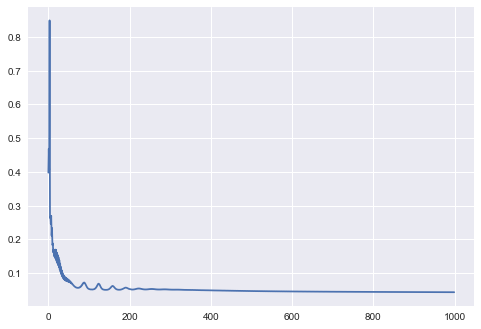

In [25]:
plt.plot(losses)
plt.show()

In [26]:
outputs=model1.predict(X)

np.sum(outputs==Y)/Y.shape[0]

0.9671111111111111

In [27]:
def plot_decision_boundary(model, X, y,cmap=plt.cm.jet):
    """
    Given a model(a function) and a set of points(X), corresponding labels(y), scatter the points in X with color coding
    according to y. Also use the model to predict the label at grid points to get the region for each label, and thus the 
    descion boundary.
    Example usage:
    say we have a function predict(x,other params) which makes 0/1 prediction for point x and we want to plot
    train set then call as:
    plot_decision_boundary(lambda x:predict(x,other params),X_train,Y_train)
    params(3): 
        model : a function which expectes the point to make 0/1 label prediction
        X : a (mx2) numpy array with the points
        y : a (mx1) numpy array with labels
    outputs(None)
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.style.use("seaborn")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.jet)
    plt.show()
    
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

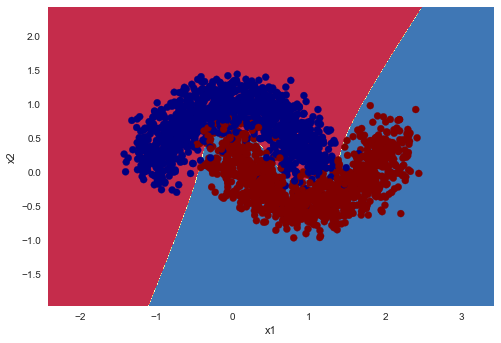

In [28]:
plot_decision_boundary(lambda x:model1.predict(x),X,Y)


In [30]:
df2=pd.read_csv('C:/Users/91885/Python programs/Logistic_X_Test.csv')

In [34]:
X_Test=df2.to_numpy()

In [41]:
Y_Test=model1.predict(X_Test)
out={"label":Y_Test}
df3=pd.DataFrame(out)
print(df3)
df3.to_csv('final.csv',index=False)
print(Y_Test)

     label
0        0
1        0
2        1
3        0
4        1
..     ...
745      0
746      1
747      0
748      0
749      0

[750 rows x 1 columns]
[0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1
 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1
 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1
 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1
 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1
 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1
 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1
 1 0 1 0 1 0 0 0 0 